In [1]:
import sys

sys.path.append("..")
sys.path.append("../../")
sys.path.append("../../src")

import os
import jax
import matplotlib.pyplot as plt
from functional_autoencoders.datasets import get_dataloaders
from functional_autoencoders.datasets.navier_stokes import NavierStokes
from functional_autoencoders.util import pickle_load
from plots import plot_latent_interpolation

# %load_ext autoreload
# %autoreload 2

key = jax.random.PRNGKey(42)

In [2]:
MODEL_OUT_DIR = "../../tmp/experiments/sparse_training/models"
VISCOSITY = 1e-4

train_dataloader_full, test_dataloader_full = get_dataloaders(
    NavierStokes, data_base="../..", viscosity=VISCOSITY, resolution=64, load_fast=True
)

info = pickle_load(os.path.join(MODEL_OUT_DIR, "model.pkl"))
results = info["results"]
autoencoder = info["autoencoder"]
state = results["state"]

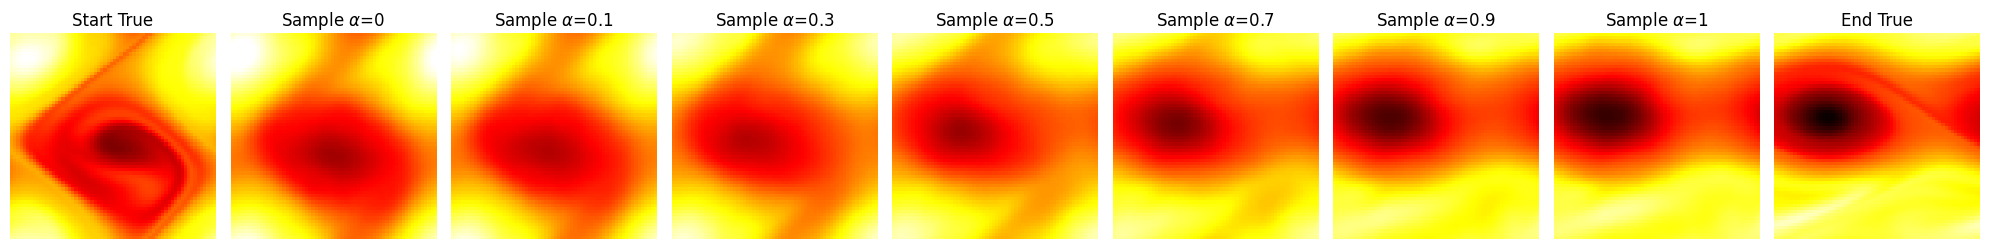

In [3]:
plt.rcParams["figure.figsize"] = (20, 3)

START_IDX = 10
END_IDX = 12
ALPHA_LIST = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

SAVE_DIR = None
# SAVE_DIR = f'../../figures/sparse_training/latent_interpolation/{START_IDX}_{END_IDX}'
# os.makedirs(SAVE_DIR, exist_ok=True)

u, x, _, _ = next(iter(test_dataloader_full))
z = autoencoder.encode(state, u, x)

plot_latent_interpolation(
    autoencoder=autoencoder,
    state=state,
    alpha_list=ALPHA_LIST,
    u_start=u[START_IDX],
    u_end=u[END_IDX],
    z_start=z[START_IDX],
    z_end=z[END_IDX],
    save_dir=SAVE_DIR,
)